In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

<Axes: ylabel='Density'>

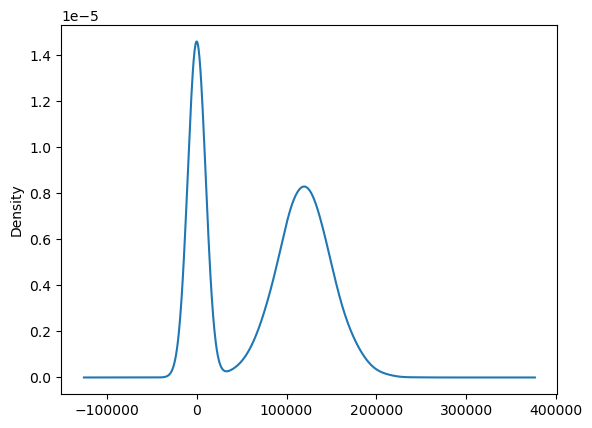

In [4]:
df['Balance'].plot(kind="kde")

<Axes: ylabel='Density'>

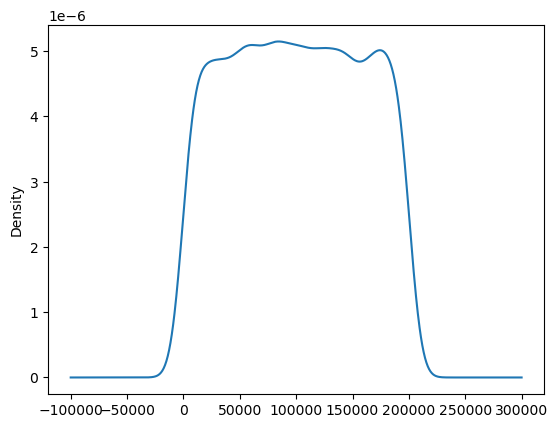

In [5]:
df['EstimatedSalary'].plot(kind='kde')

<Axes: ylabel='Density'>

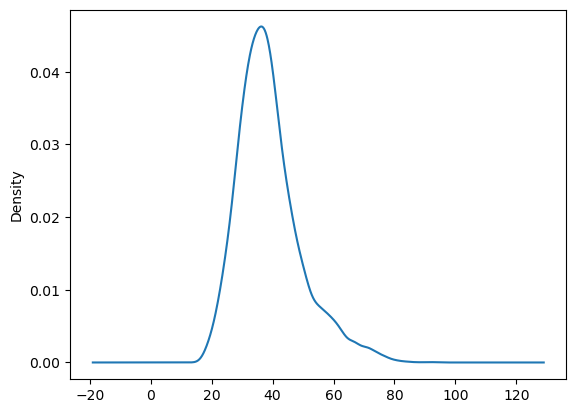

In [6]:
df['Age'].plot(kind='kde')

In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

<Axes: xlabel='Tenure', ylabel='Balance'>

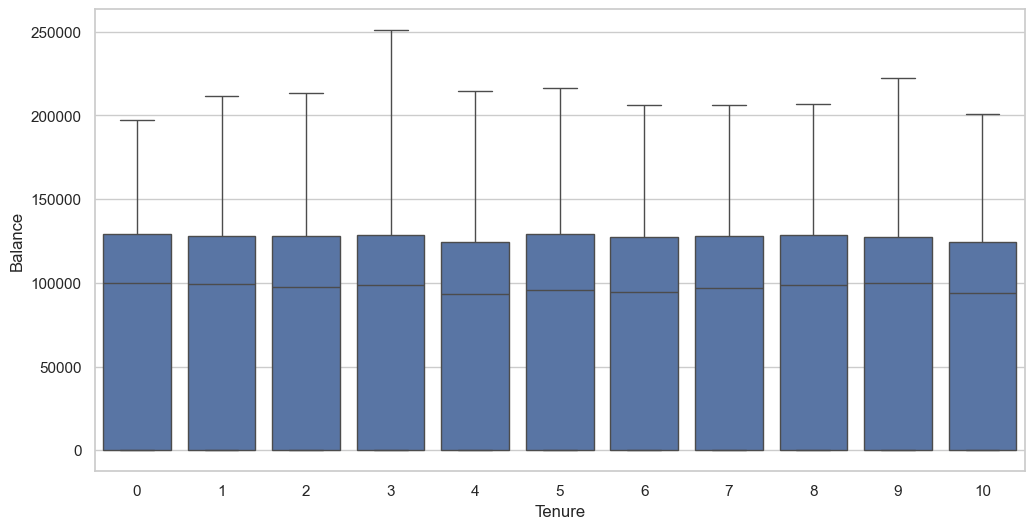

In [9]:
sns.boxplot(y=df['Balance'], x=df['Tenure'])

<Axes: xlabel='Age', ylabel='Count'>

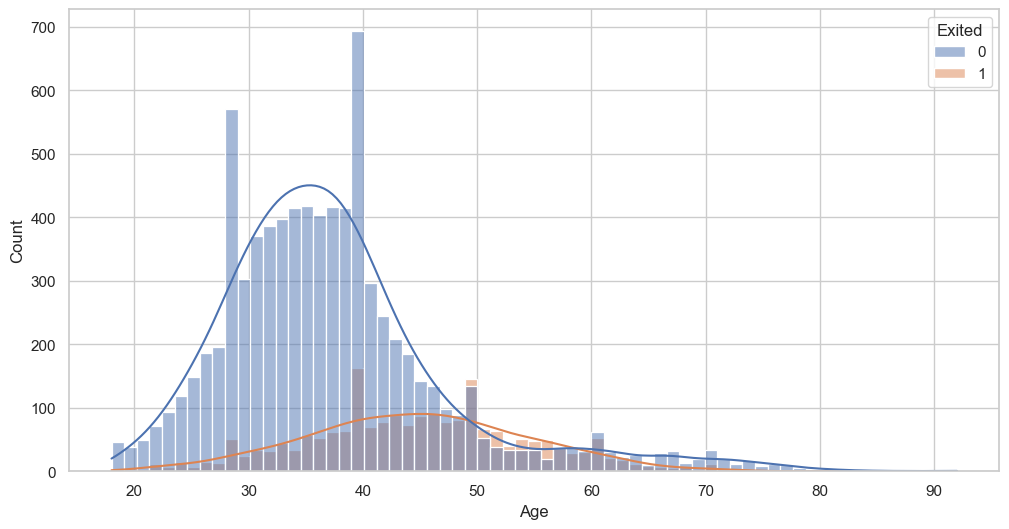

In [10]:
sns.histplot(df, x='Age', hue='Exited',kde=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [12]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

<Axes: xlabel='IsActiveMember', ylabel='count'>

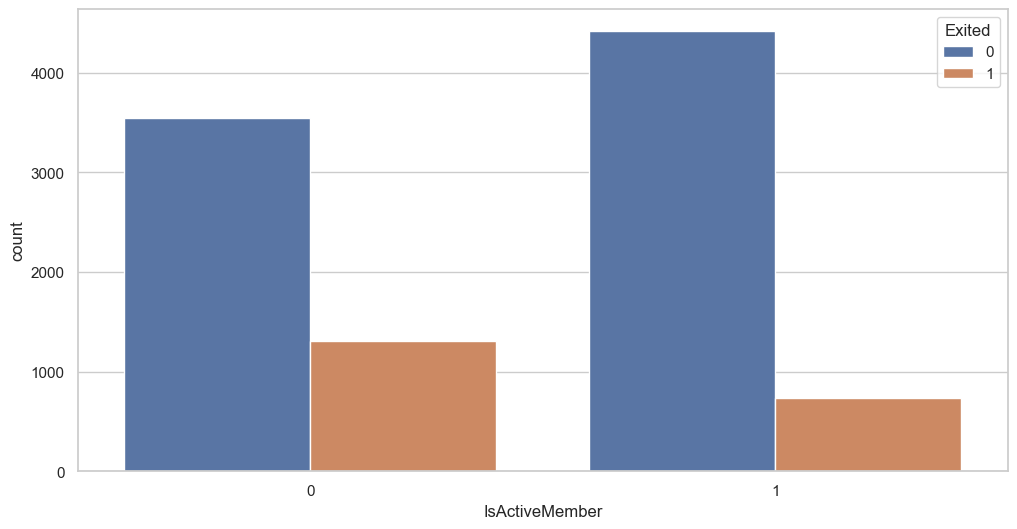

In [13]:
sns.countplot(df,x='IsActiveMember', hue='Exited')

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [7]:
X= df.drop('Exited', axis=1)
y = df['Exited']

In [16]:
class ModelBuilding:

    def __init__(self, X_trn, X_tst, y_trn, y_tst):
        self.X_trn = X_trn
        self.X_tst = X_tst
        self.y_trn = y_trn
        self.y_tst = y_tst
        model=None
        y_pred=None

    def training(self, model):
        model.fit(self.X_trn,self.y_trn)

    def prediction(self):
        y_pred = model.predict(self.X_tst)
        return y_pred

    def score(self):
        return accuracy_score(self.y_tst, y_pred)

In [8]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [9]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2)

for train_idx,test_idx in sss.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    # print("train",train_idx, train_idx.shape)
    # print("test",test_idx)

In [10]:
X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [11]:
(np.array(y_train)==0).sum(), (np.array(y_train)==1).sum()

(6370, 1630)

In [12]:
(np.array(y_test)==0).sum(), (np.array(y_test)==1).sum()

(1592, 408)

In [13]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
8022,616,France,Female,31,3,136789.14,1,1,0,59346.40,1,1,PLATINUM,861
2963,655,France,Female,51,3,0.00,2,0,1,15801.02,0,1,SILVER,629
7690,569,Spain,Male,31,1,115406.97,1,0,0,145528.22,0,2,GOLD,992
6353,598,France,Male,35,8,114212.60,1,1,1,74322.85,0,2,PLATINUM,629
9763,619,France,Male,27,1,154483.98,1,1,0,156394.74,0,2,SILVER,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6878,651,France,Male,35,0,181821.96,2,0,1,36923.67,1,5,PLATINUM,539
4463,850,Germany,Female,70,1,96947.58,3,1,0,62282.99,1,5,GOLD,365
2239,493,France,Female,31,3,0.00,1,1,1,176570.28,1,4,SILVER,808
6269,652,Spain,Female,36,1,0.00,2,1,1,19302.78,0,3,GOLD,219


In [14]:
trf = ColumnTransformer([
    ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[1,2,12])], remainder='passthrough')
# trf1 = ColumnTransformer([('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[2])],remainder='passthrough')
# trf2 = ColumnTransformer([('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),[12])],remainder='passthrough')

In [15]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [16]:
X_train_trf.shape

(8000, 20)

In [17]:
X_train_trf[0:1000].shape

(1000, 20)

In [18]:
clf = LogisticRegression(solver="newton-cholesky")

In [19]:
# idx1 = 0
# idx2 = 2000
# for i in range(4):
#     clf.fit(X_train_trf[idx1:idx2], y_train[idx1:idx2])
#     print(idx1,idx2)
#     idx1+=idx2
#     idx2*=2
#     if idx2>8000:
#         break

In [20]:
clf.fit(X_train_trf,y_train)

LogisticRegression(solver='newton-cholesky')

In [21]:
y_pred = clf.predict(X_test_trf)

In [22]:
accuracy_score(y_test,y_pred)

0.999

In [23]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(clf,X_train_trf,y_train,cv=10,scoring='accuracy').mean()

In [24]:
cross_val

0.9984999999999999

In [25]:
clf.predict(trf.transform(X_test.iloc[0:1]))

array([0], dtype=int64)

In [31]:
y_test.iloc[0:1]

1478    1
Name: Exited, dtype: int64

In [32]:
X_test.iloc[0:1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
1478,649,France,Female,45,5,92786.66,1,1,0,173365.9,1,1,GOLD,919


In [36]:
new = np.array([[500, "France", "Female", 50, 10, 0, 1, 0, 0, 0, 1, 1, 'GOLD', 300]])

In [39]:
new_df = pd.DataFrame(new, columns=X_test.columns)

In [41]:
new_trf = trf.transform(new_df)

In [44]:
clf.predict(new_trf.astype(np.int64))

array([1], dtype=int64)

In [43]:
X_test.iloc[0]

CreditScore                649
Geography               France
Gender                  Female
Age                         45
Tenure                       5
Balance               92786.66
NumOfProducts                1
HasCrCard                    1
IsActiveMember               0
EstimatedSalary       173365.9
Complain                     1
Satisfaction Score           1
Card Type                 GOLD
Point Earned               919
Name: 1478, dtype: object

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
confusion_matrix(y_test,y_pred)

array([[1591,    1],
       [   2,  406]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [36]:
print(classification_report(y_train,clf.predict(X_train_trf)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       0.99      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [75]:
clf.classes_

array([0, 1], dtype=int64)

In [77]:
clf.coef_

array([[ 8.62495603e-03,  6.00384547e-03, -1.46288015e-02,
         8.90722271e-02, -8.90722271e-02,  1.42078534e-02,
        -7.42881606e-02, -2.92580454e-02,  8.93383525e-02,
         6.62441667e-04,  5.09342796e-02,  1.17785947e-02,
         2.45311013e-08, -1.27479934e-01, -7.22899610e-02,
        -6.69078319e-01,  2.34184194e-06,  1.05473252e+01,
        -9.75625756e-02, -7.87633521e-04]])

In [93]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cholesky',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

{'fit': {'sample_weight': None}, 'score': {'sample_weight': None}}

In [141]:
from sklearn.pipeline import make_pipeline
import time
pipe = make_pipeline(trf,clf)

In [143]:
start = time.time()
pipe.fit(X_train,y_train)
end = time.time()
print(end-start)

0.09875845909118652


In [145]:

start = time.time()
y_pred = pipe.predict(X_test)
end = time.time()
print(end-start)

0.024330615997314453


In [109]:
accuracy_score(y_test,y_pred)

0.9985

In [139]:
pipe.named_steps['columntransformer'].transformers_[0][1].n_features_in_

3

In [147]:
import pickle
pickle.dump(pipe,open("pipe.pkl","wb"))

In [149]:
pip = pickle.load(open("pipe.pkl", "rb"))

In [151]:
pip.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('encode',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    [1, 2, 12])])),
  ('logisticregression', LogisticRegression(solver='newton-cholesky'))],
 'transform_input': None,
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('encode',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 2, 12])]),
 'logisticregression': LogisticRegression(solver='newton-cholesky'),
 'columntransformer__force_int_remainder_cols': True,
 'columntransformer__n_jobs': None,
 'columntransformer__remainder': 'passthrough',
 'columntransformer__sparse_thres

In [27]:
decision_arr = clf.decision_function(X_train_trf)

In [28]:
decision_arr.shape

(8000,)

In [ ]:
clf.coef_

array([[-3.08074354e-03, -1.62712936e-01,  1.65793680e-01,
         1.48440197e-01, -1.48440197e-01,  2.23603761e-01,
        -1.32447331e-01, -2.30510748e-01,  1.39354318e-01,
        -4.16348281e-04,  5.64985878e-02, -4.95975348e-02,
         2.62676554e-06, -2.53750956e-01, -2.96324899e-02,
        -8.53748234e-01,  8.81127998e-07,  1.05261567e+01,
        -6.74390342e-02, -9.33769150e-04]])

In [30]:
clf.densify()

LogisticRegression(solver='newton-cholesky')

In [37]:
clf.predict_proba(X_train_trf)

array([[1.15519917e-02, 9.88448008e-01],
       [9.97134645e-01, 2.86535500e-03],
       [9.97824712e-01, 2.17528781e-03],
       ...,
       [2.63969614e-02, 9.73603039e-01],
       [9.98469662e-01, 1.53033792e-03],
       [9.99699916e-01, 3.00084344e-04]])

In [39]:
clf.predict_log_proba(X_test_trf)

array([[-7.65706159e-04, -7.17509489e+00],
       [-4.69480521e-04, -7.66411848e+00],
       [-5.37243758e+00, -4.65361158e-03],
       ...,
       [-5.02557107e-03, -5.29572792e+00],
       [-5.59869292e+00, -3.70957225e-03],
       [-9.75481795e-04, -6.93306676e+00]])

In [40]:
y_test

7073    0
7859    0
3957    1
1905    0
8536    0
       ..
8322    0
819     0
4532    0
7533    1
5848    0
Name: Exited, Length: 2000, dtype: int64